# Tensorflow 2 Learning
This is my first Jupyter Notebook where I can experiment with the development environment and hopefully learn a bit of Tensorflow2 at the same time!

In [672]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Create a tensor using some random data. Note that the `tf.placeholder()` function has been removed fromo TF2 unless you're willing to mess about with TF1 compatibility.

In [673]:
a = np.random.rand(5, 5)
A = tf.constant(a, shape=(5, 5), dtype=tf.float32)
print(A)

tf.Tensor(
[[0.03303744 0.93262285 0.24207798 0.77854306 0.34117654]
 [0.22895883 0.96450007 0.0450967  0.22284345 0.09692388]
 [0.3433291  0.00888974 0.9552447  0.24521711 0.52518773]
 [0.33904248 0.24344616 0.67537636 0.9962974  0.84358543]
 [0.5749882  0.78393745 0.7197737  0.00718119 0.2783812 ]], shape=(5, 5), dtype=float32)


Now create a scalar that we can use for a multiplication.

In [674]:
s = tf.constant(2, dtype=tf.float32)
print(s)

tf.Tensor(2.0, shape=(), dtype=float32)


You can multiply a tensor with a vector using the * operator.

In [675]:
A * s

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[0.06607489, 1.8652457 , 0.48415595, 1.5570861 , 0.6823531 ],
       [0.45791766, 1.9290001 , 0.0901934 , 0.4456869 , 0.19384776],
       [0.6866582 , 0.01777948, 1.9104894 , 0.49043423, 1.0503755 ],
       [0.67808497, 0.4868923 , 1.3507527 , 1.9925948 , 1.6871709 ],
       [1.1499764 , 1.5678749 , 1.4395474 , 0.01436239, 0.5567624 ]],
      dtype=float32)>

Or you can use the rf.math functions. The tf.math functions obviously include a load of other things that aren't available as Python mathematical operations.

In [676]:
tf.math.multiply(A, s)

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[0.06607489, 1.8652457 , 0.48415595, 1.5570861 , 0.6823531 ],
       [0.45791766, 1.9290001 , 0.0901934 , 0.4456869 , 0.19384776],
       [0.6866582 , 0.01777948, 1.9104894 , 0.49043423, 1.0503755 ],
       [0.67808497, 0.4868923 , 1.3507527 , 1.9925948 , 1.6871709 ],
       [1.1499764 , 1.5678749 , 1.4395474 , 0.01436239, 0.5567624 ]],
      dtype=float32)>

We can also create a vector to multiply using `matmul()`.

In [677]:
v = np.array([[2],[1],[2],[1],[2]])
V = tf.constant(v, dtype=tf.float32)

The `tf.math.multiply()` function behaves differently from matrix multiplication. Look at the values for rows 2 and 4 below and compare them to the scalar multiplication. The vector V has just been applied to every column.

In [678]:
tf.math.multiply(A, V)

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[0.06607489, 1.8652457 , 0.48415595, 1.5570861 , 0.6823531 ],
       [0.22895883, 0.96450007, 0.0450967 , 0.22284345, 0.09692388],
       [0.6866582 , 0.01777948, 1.9104894 , 0.49043423, 1.0503755 ],
       [0.33904248, 0.24344616, 0.67537636, 0.9962974 , 0.84358543],
       [1.1499764 , 1.5678749 , 1.4395474 , 0.01436239, 0.5567624 ]],
      dtype=float32)>

As opposed to below where we are using a matrix multiplication. Here the output tensor is a 1D array of values.

In [679]:
tf.linalg.matmul(A, V)

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[2.9437497],
       [1.9293023],
       [3.90163  ],
       [4.955752 ],
       [3.9374049]], dtype=float32)>

The vector V and scalar s we created above are both immutable. To create something that can be manipulated inside a training loop and stored / loaded with the model, we can use the `tf.Variable` class.

In [680]:
# initialise the variables
s = tf.Variable(2.)
V = tf.Variable(v)

print(s)
print(V)

# manipulate the variables
s.assign(3)
V[0].assign([3])

print(s)
print(V)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0>
<tf.Variable 'Variable:0' shape=(5, 1) dtype=int64, numpy=
array([[2],
       [1],
       [2],
       [1],
       [2]])>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>
<tf.Variable 'Variable:0' shape=(5, 1) dtype=int64, numpy=
array([[3],
       [1],
       [2],
       [1],
       [2]])>


## Experimenting With Cost and Gradient Descent
This has all changed since TF1 and again, I'm not interested in working in V1 compatibility mode as I'll jest end up learning information that is already out of date.

What we're going to do is create a tf.Variable and minimise it by gradient descent.

In [681]:
# w is our scalar 'weight'
w = tf.Variable(20.)

The loss function calculates the error which is normally given by $loss = {1\over2}(\hat{y} - y)^2$. In this case we are trying to optimize towards 0 which would be $loss = {1\over2}(w - 0)^2$ and simplifies to $loss={1\over2} w^2$.

In [682]:
# create some lists to hold the history data from the training.
loss_history = []
weight_history = []

# loss = lambda: (w ** 2)/2.0
def loss():
    """
    Calculate and return the loss and log all the changes in the history lists.
    """
    l = (w ** 2)/2.0
    loss_history.append(l.numpy())
    weight_history.append(w.numpy())
    return l

Create the optimizer function which will be a Stochastic Gradient Descent with a learning rate of 0.1.

In [683]:
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

Now run the custom training loop by running the optimizer minimize method. 

In [684]:
for step in range(40):
    step_count = opt.minimize(loss, [w]).numpy()
    # print(f"STEP: {step_count} W: {w.numpy():.4f}")

Print out the loss and weight history so we can see it all worked.

In [685]:
print(loss_history, '\n')
print(weight_history)

[200.0, 162.0, 131.22002, 106.288216, 86.09345, 69.7357, 56.485924, 45.753593, 37.060413, 30.018934, 24.315338, 19.695423, 15.953293, 12.922169, 10.466956, 8.478235, 6.867371, 5.562571, 4.5056825, 3.649603, 2.9561784, 2.3945045, 1.9395486, 1.5710343, 1.2725377, 1.0307556, 0.8349121, 0.6762788, 0.5477858, 0.4437065, 0.3594023, 0.29111585, 0.23580381, 0.1910011, 0.1547109, 0.12531583, 0.10150582, 0.08221971, 0.06659797, 0.05394436] 

[20.0, 18.0, 16.2, 14.580001, 13.122001, 11.809801, 10.628821, 9.565939, 8.609345, 7.7484107, 6.97357, 6.2762127, 5.6485915, 5.0837326, 4.5753593, 4.1178236, 3.7060413, 3.3354373, 3.0018935, 2.7017043, 2.4315338, 2.1883805, 1.9695424, 1.7725881, 1.5953293, 1.4357964, 1.2922168, 1.1629951, 1.0466956, 0.942026, 0.84782344, 0.7630411, 0.68673694, 0.6180633, 0.55625695, 0.5006313, 0.45056814, 0.40551132, 0.3649602, 0.32846418]


Plot the weight and loss change so we can see the progress of the training.

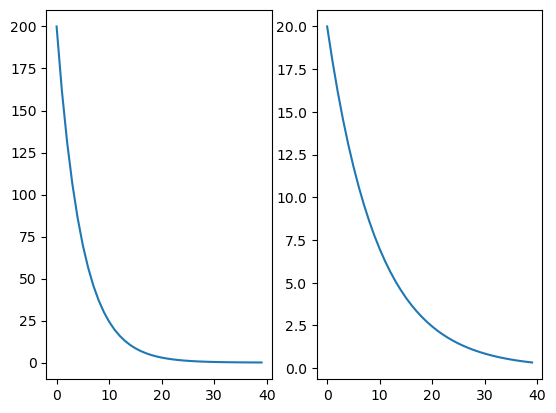

In [686]:
loss_plt = plt.subplot(1, 2, 1)
loss_plt.plot(loss_history)
weight_plt = plt.subplot(1, 2, 2)
weight_plt.plot(weight_history)
plt.show()

## Optimizing With L-BFGS
In this section we'll integrate a SciPy optimizer that works well for style transfer using pure TF2. Being able to integrate SciPy optimizers is probably a really good thing to be able to do! 

SciPy documentation can be found at [https://docs.scipy.org](https://docs.scipy.org/) and the specific docs relating to optimizers can be found [here](https://docs.scipy.org/doc/scipy/reference/optimize.html).

The framework for this code came from [Stack Overflow](https://stackoverflow.com/a/60443339/10868745) so credit to [A Roebel](https://stackoverflow.com/users/3932675/a-roebel)

In [687]:
import scipy.optimize as sopt

Reset the w variable so it's back to the beginning again.

In [688]:
w = tf.Variable(20.)

In [689]:
def calculate_loss(x):
    print(f'Calculating loss for {x}')
    return tf.reduce_sum(tf.square(x-tf.constant(2, dtype=tf.float32)))

In [690]:
@tf.function
def val_and_grad(x):
    with tf.GradientTape() as tape:
        tape.watch(x)
        loss = calculate_loss(x)
        print(f'loss: {loss}')
    grad = tape.gradient(loss, x)
    return loss, grad

In [691]:
def func(x):
    print(f'Inside func(x) with x: {x}')
    w.assign(x[0])
    return [vv.numpy().astype(np.float64) for vv in val_and_grad(tf.constant(x, dtype=tf.float32))]

In [692]:
resdd = sopt.minimize(fun=func, x0=np.array(w), jac=True, method='L-BFGS-B')

print("\ninfo:\n", resdd)
print(f"weight w: {w.numpy()}")

Inside func(x) with x: [20.]
Calculating loss for Tensor("x:0", shape=(1,), dtype=float32)
loss: Tensor("Sum:0", shape=(), dtype=float32)
Inside func(x) with x: [19.]
Inside func(x) with x: [15.]
Inside func(x) with x: [2.]

info:
       fun: 0.0
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 2
     njev: 4
   status: 0
  success: True
        x: array([2.])
weight w: 2.0
